In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data, decode_captions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [5]:
data = load_coco_data(data_path='./data', split='train')
word_to_idx = data['word_to_idx']

image_idxs <type 'numpy.ndarray'> (400131,) int32
features <type 'numpy.ndarray'> (82783, 196, 512) float32
file_names <type 'numpy.ndarray'> (82783,) <U31
captions <type 'numpy.ndarray'> (400131, 17) int32
annotations <class 'pandas.core.frame.DataFrame'> 400131
word_to_idx <type 'dict'> 24352
elapse time: 70.67


In [6]:
mem = data['captions']

In [7]:
data['captions'] = mem[0:20000]
data['image_idxs'] = data['image_idxs'][0:20000]

In [ ]:
#data['features'] = data['features']/

In [8]:
model = CaptionGenerator(word_to_idx, batch_size= 128, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=512, n_time_step=16, cell_type='lstm', dtype=tf.float32)

In [10]:
solver = CaptioningSolver(model, data, n_epochs=40, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=150, save_every=20, image_path='./image/train2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-40')

In [11]:
solver.train()

num epochs: 40
iterations per epoch: 156
data size: 20000
batch size: 128

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial Train Loss: 14700.79492
Generated Caption: 2007 discovery underbelly underbelly underbelly underbelly underbelly passing crusiers imagry mention mousepad imagry giraffis imagry departs dry/dead torn-up griaffe ark
Generated Caption: sunglasse duvet herded cranberries whole driveways betwwen flamingoes betwwen flamingoes photographed betwwen horn-rimmed betwwen crispie betwwen sipping foamy brie sil
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Ground Truth 1: <START> a kitchen with black appliances and red walls <END>
Ground Truth 1: <START> a clean up-to-date kitchen counter with modern utensils and appliances <END>
Ground Truth 1: <START> a small kitchen with a stove and microwave and counter tops <END>
Ground Truth 1: <ST

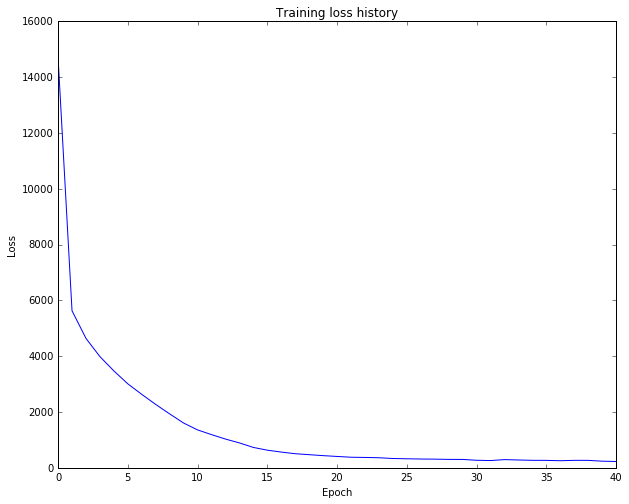

In [12]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

Sampled Caption: artful figurines displayed indoors on shelving in cabinet <END>


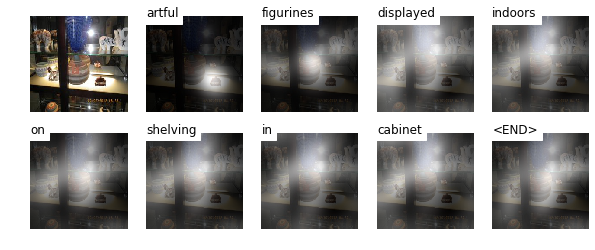

Sampled Caption: cows grazing in a field on a cloudy day <END>


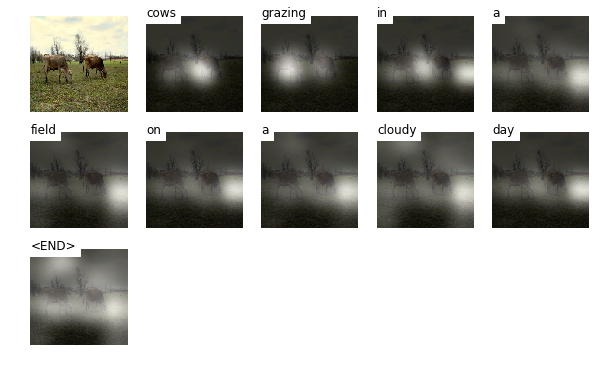

Sampled Caption: a train passes by a freshly cut field <END>


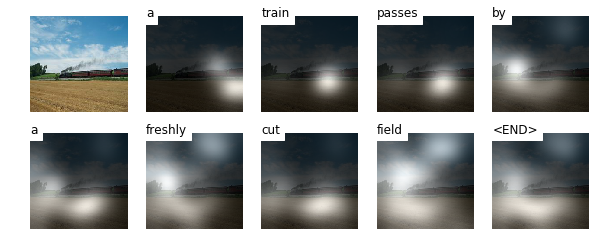

Sampled Caption: two people laugh while playing a game on a couch <END>


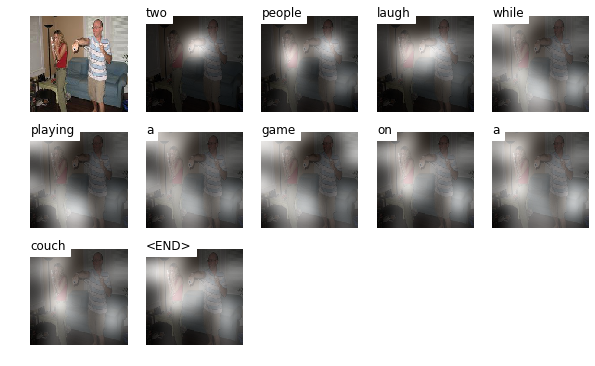

Sampled Caption: a living room with boxes and a couch and table <END>


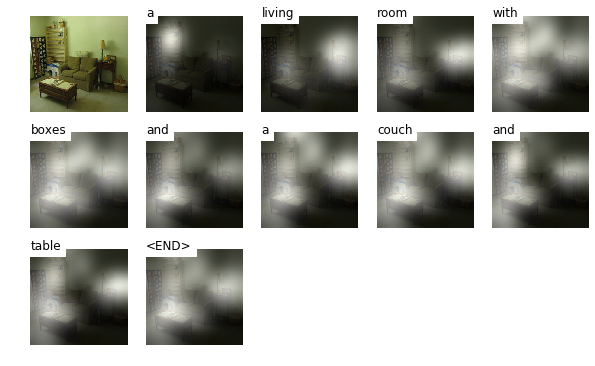

Sampled Caption: a man and two cats in a bed <END>


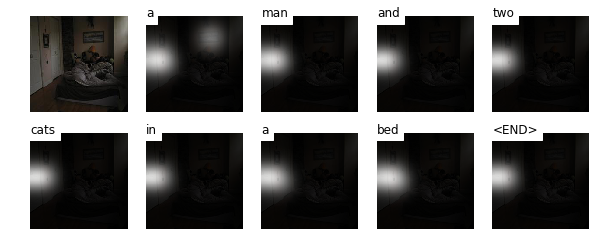

Sampled Caption: a man is going down a hill on a snowboard <END>


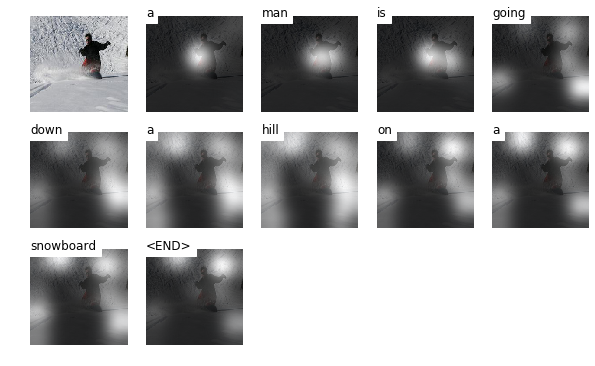

Sampled Caption: a jetliner coming in an airport landing near a city <END>


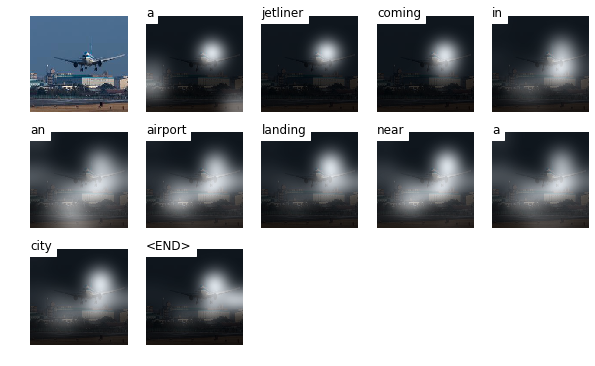

Sampled Caption: man in front of a large screen playing a musical video game <END>


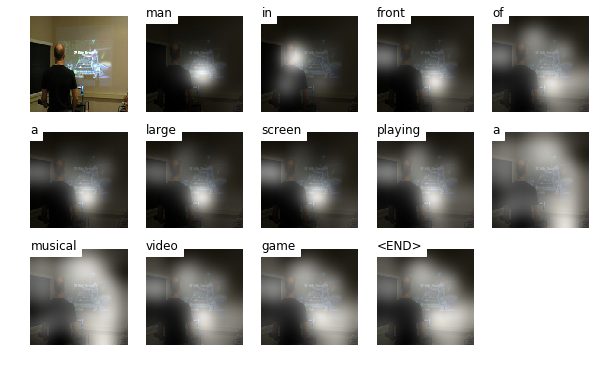

Sampled Caption: a man standing in a plaza with other people watching <END>


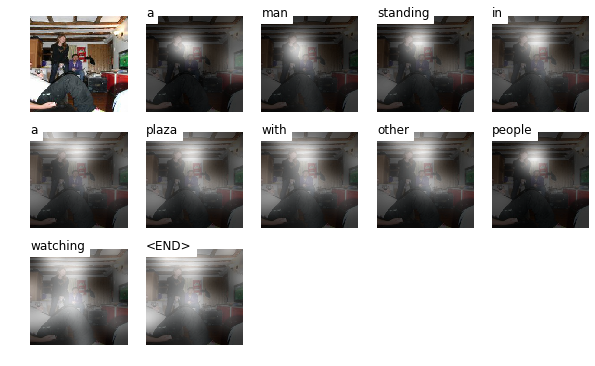

In [13]:
solver.test(data)